<a href="https://colab.research.google.com/github/AhmedAlmaaini/Real-and-Fake-Face-Detection/blob/main/real_vs_flake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/real_and_fake_face/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/real_and_fake_face/test'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/real_and_fake_face/train/real')))
print(len(os.listdir('/content/drive/MyDrive/real_and_fake_face/train/fake')))
print(len(os.listdir('/content/drive/MyDrive/real_and_fake_face/test/real')))
print(len(os.listdir('/content/drive/MyDrive/real_and_fake_face/test/fake')))

570
508
276
247


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255, #normalisation / feature scaling
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 863 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 213s 8s/step - accuracy: 0.4883 - loss: 0.8196 - val_accuracy: 0.5302 - val_loss: 0.7002
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 147s 5s/step - accuracy: 0.5685 - loss: 0.7009 - val_accuracy: 0.5674 - val_loss: 0.6875
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 156s 6s/step - accuracy: 0.6030 - loss: 0.6692 - val_accuracy: 0.5023 - val_loss: 0.7227
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 146s 5s/step - accuracy: 0.6253 - loss: 0.6509 - val_accuracy: 0.5814 - val_loss: 0.7791
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 149s 5s/step - accuracy: 0.6660 - loss: 0.5741 - val_accuracy: 0.6047 - val_loss: 0.7638
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 147s 5s/step - accuracy: 0.7716 - loss: 0.4677 - val_accuracy: 0.5628 - val_loss: 0.7602
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 154s 6s/step - accuracy: 0.8511 - loss: 0.3761 - val_accuracy: 0.5395 - val_loss: 0.9524
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 159s 6s/step - accuracy: 0.9354 - loss: 0.2080 - val_accuracy: 0.5814 - v

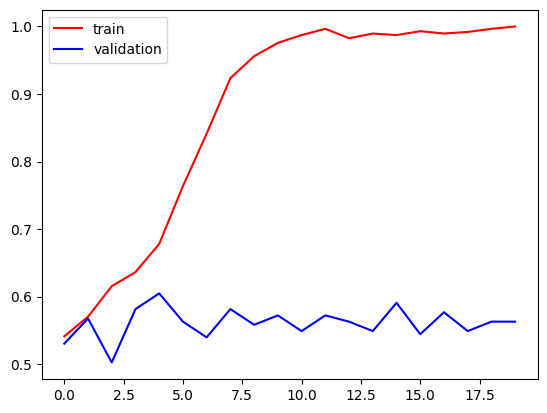

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

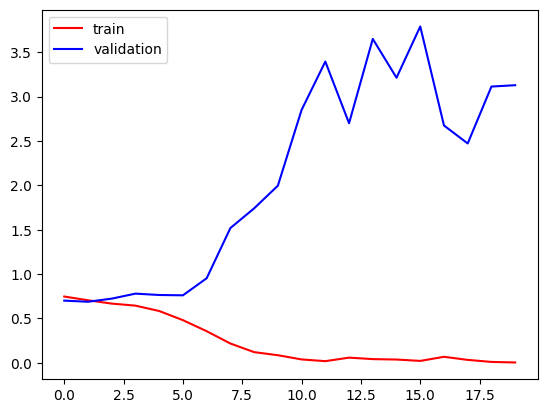

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 523 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)


17/17 ━━━━━━━━━━━━━━━━━━━━ 78s 5s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[128 119]
 [139 137]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.52      0.50       247
           1       0.54      0.50      0.52       276

    accuracy                           0.51       523
   macro avg       0.51      0.51      0.51       523
weighted avg       0.51      0.51      0.51       523



There is overfitting and hence applying Batchnormalisation and Dropout techniques to handle overfitting

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 245s 9s/step - accuracy: 0.4933 - loss: 7.2906 - val_accuracy: 0.3814 - val_loss: 1.6183
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 225s 8s/step - accuracy: 0.6040 - loss: 3.2621 - val_accuracy: 0.4558 - val_loss: 2.7337
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 242s 9s/step - accuracy: 0.6457 - loss: 1.9011 - val_accuracy: 0.5070 - val_loss: 2.3298
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 236s 9s/step - accuracy: 0.6180 - loss: 2.0625 - val_accuracy: 0.5349 - val_loss: 2.5341
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 234s 9s/step - accuracy: 0.6774 - loss: 1.2988 - val_accuracy: 0.5442 - val_loss: 3.8677
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 237s 9s/step - accuracy: 0.7274 - loss: 0.9363 - val_accuracy: 0.5209 - val_loss: 2.2701
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 227s 8s/step - accuracy: 0.6789 - loss: 0.8481 - val_accuracy: 0.5488 - val_loss: 1.2179
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 228s 8s/step - accuracy: 0.7452 - loss: 0.8041 - val_accuracy: 0.5349 - v

In [ ]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 523 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[131 116]
 [154 122]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.46      0.53      0.49       247
           1       0.51      0.44      0.47       276

    accuracy                           0.48       523
   macro avg       0.49      0.49      0.48       523
weighted avg       0.49      0.48      0.48       523



Using Pre-trained model - Resnet

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 296s 11s/step - accuracy: 0.5237 - loss: 3.8776 - val_accuracy: 0.4744 - val_loss: 0.8718
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 251s 9s/step - accuracy: 0.5038 - loss: 0.8594 - val_accuracy: 0.5349 - val_loss: 0.6952
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 295s 11s/step - accuracy: 0.5399 - loss: 0.7009 - val_accuracy: 0.6140 - val_loss: 0.6686
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 251s 9s/step - accuracy: 0.6673 - loss: 0.6406 - val_accuracy: 0.5116 - val_loss: 0.7448
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 254s 9s/step - accuracy: 0.6231 - loss: 0.6462 - val_accuracy: 0.5163 - val_loss: 0.7448
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 253s 9s/step - accuracy: 0.6231 - loss: 0.6442 - val_accuracy: 0.5349 - val_loss: 0.8306
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 254s 9s/step - accuracy: 0.5770 - loss: 0.7284 - val_accuracy: 0.5116 - val_loss: 0.7296
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 255s 9s/step - accuracy: 0.6442 - loss: 0.6171 - val_accuracy: 0.5907 -

In [ ]:
predictions = resnet_model.predict(test_data)

17/17 ━━━━━━━━━━━━━━━━━━━━ 129s 7s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 89 158]
 [104 172]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.46      0.36      0.40       247
           1       0.52      0.62      0.57       276

    accuracy                           0.50       523
   macro avg       0.49      0.49      0.49       523
weighted avg       0.49      0.50      0.49       523

